# Análise de resposta em frequência e Diagrama de Bode

----
Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

A **resposta em frequência** é a resposta em regime permanente de um sistema comandado por uma entrada senoidal. 

Seja, por exemplo, o sistema LIT massa-mola-amortecedor submetido a um **forçamento harmônico**, conforme mostrado na figura a seguir. 

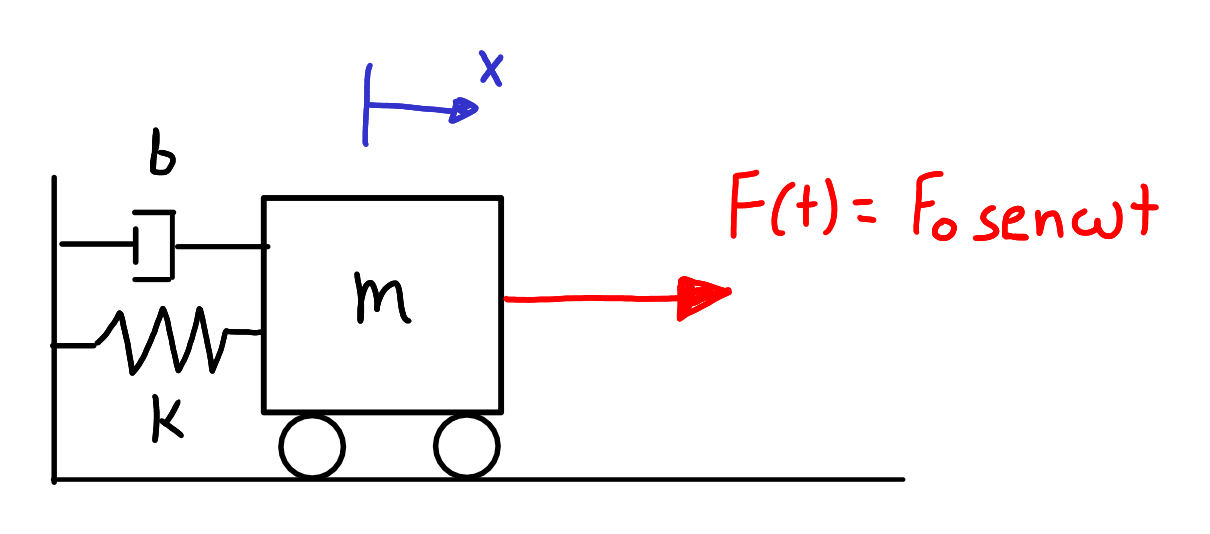

Este sistema é modelado matematicamente por uma E.D.O não homogênea de segunda ordem. A solução desta equação é dada por:

$x(t) = x_h + x_p$

Onde $x_h$ é a solução homogênea (vibração livre, regime transiente) e $x_p$ é a solução particular (resposta ao forçamento, regime permanente). 

Considerando que o sistema seja dissipativo, a resposta em regime permanente será:

$x_p = A cos(\omega t + \phi)$

Onde $\omega$ é a frequência de forçamento, $\phi$ é o ângulo de fase (atraso na resposta) e $A$ é a amplitude de resposta. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

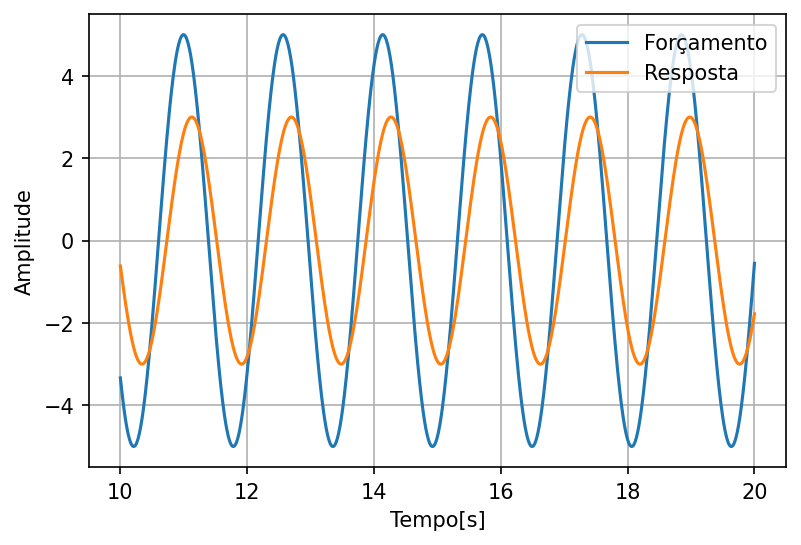

In [2]:
t_n = np.linspace(10,20,1000)
plt.figure(dpi = 150)
plt.plot(t_n,5*np.cos(4*t_n))
plt.plot(t_n, 3*np.cos(4*t_n - np.pi/6))
plt.legend(['Forçamento','Resposta'])
plt.ylabel('Amplitude')
plt.xlabel('Tempo[s]')
plt.grid(True)
plt.show()

**Transformada de Fourier**

A transformada de Fourier passa o sistema para o domínio da frequência. Ela é definida como:

$\mathscr{F}\{x(t)\} = \int_{-\infty}^{\infty} f(x) e^{-i \omega t}dt$

E a transformada inversa pode ser escrita como:

$\mathscr{F}^{-1}\{F(\omega)\} = \dfrac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} d \omega$



Para fins de análise, é interessante escrever a resposta do sistema em regime permanente no domínio da frequência.

Em termos mais práticos, podemos converter uma expressão no domínio de Laplace para o domínio de Fourier (Domínio da Frequência) usando o senguinte artifício:

$G(i\omega) = G(s) |_{s \rightarrow i \omega}$

Deste modo, para o sistema: 

$m \ddot{x} + c \dot{x} + kx = F_0 sen{(\omega t)}$

A resposta em regime permanente será:

$X_p (i \omega) = G(i \omega) F(i \omega)$

Sabemos a "cara" da resposta, logo:

$x_p(t) = |G(i \omega)|F_0 sen(\omega t - \phi)$

Onde:

$G(i \omega) = \dfrac{1}{-m \omega^2 + i c \omega + k}$

O módulo da função complexa $G(i \omega)$ é calculado dividindo o módulo do numerador pelo denominador:

$|G(i \omega)| = \dfrac{\sqrt{1^2}}{\sqrt{(-m \omega^2 + k)^2 + (c \omega)^2}}$

Logo, a amplitude da resposta será:

A = $\dfrac{F_0}{\sqrt{(-m \omega^2 + k)^2 + (c \omega)^2}}$

E o ângulo de fase $\phi$ será: 

$\phi = tg^{-1} \left(\dfrac{0}{1} \right) - tg^{-1} \left(\dfrac{c \omega}{-m \omega^2 + k} \right)$

**Exemplo 1:**

Calcule a resposta em frequência para o sistema mostrado a seguir:

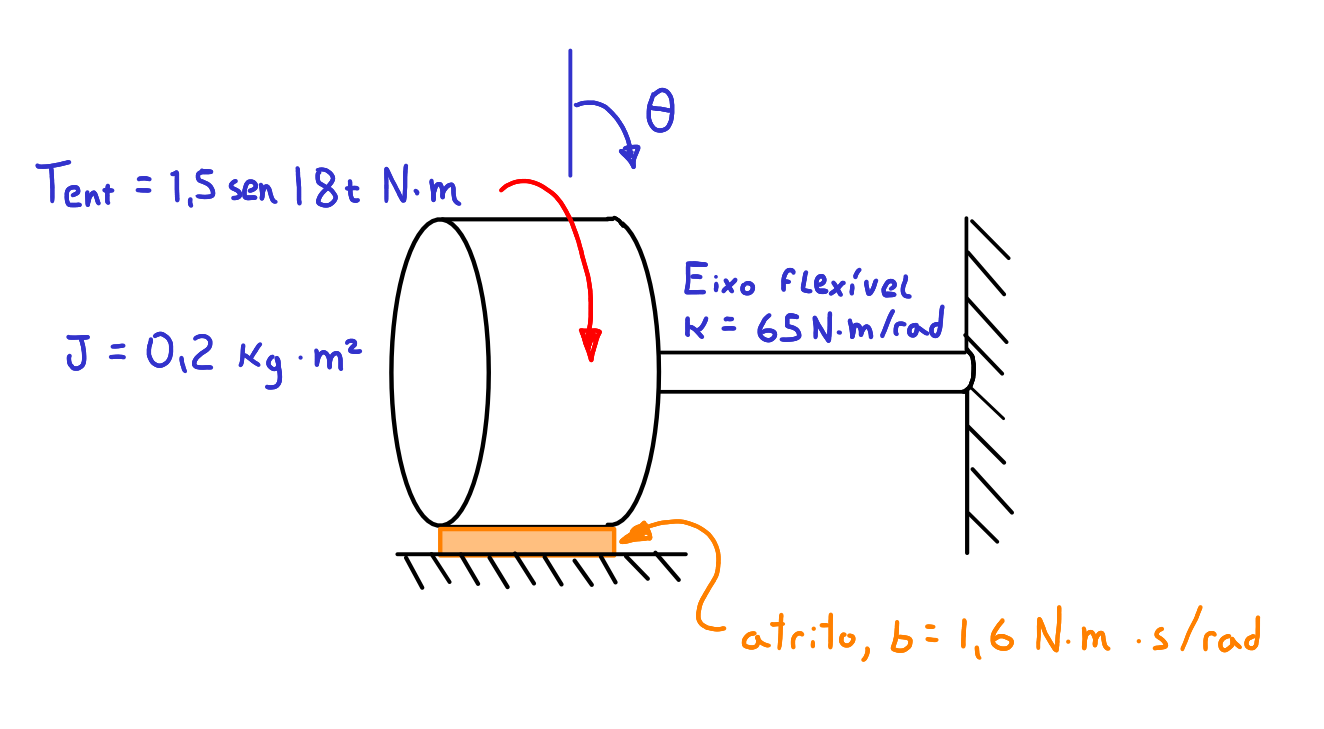

## Diagrama de Bode

A resposta em frequência de um sistema LIT é completamente determinada pelo módulo e ângulo de fase da função de transferência.

$x_p(t) = |G(i \omega)|F_0 sen(\omega t - \phi)$

Nos anos de 1930, H. W. Bode desenvolveu uma descrição gráfica para o módulo (ou razão de amplitudes) $|G(i \omega)|$ e para o ângulo de fase $\phi$ traçados em função da frequência de entrada $\omega$. 

O módulo é representado na escala logarítimica e ambos os gráficos empregam uma escala logarítmica comum para a variável independente (frequência $\omega$). 

O módulo $|G(i \omega)|$ é representado em decibéis (dB), que é definido usando o logaritmo na base 10.

$|G(i \omega)|$ em dB $= 20log_{10}|G(i \omega)|$

Pode-se resumir em algumas poucas propriedades a relação entre o módulo em valor absoluto $|G(i \omega)|$ com o correspondente em decibéis, $|G(i \omega)|_{dB}:$

1. $20log_{10}(1) = 0dB$ portanto, razão de amplitude unitária = 0dB
2. Se $|G(i \omega)| > 1$ $|G(i \omega)|_{dB} > 0$
3. Se $|G(i \omega)| < 1$, $|G(i \omega)|_{dB} < 0$
4. $|G(i \omega)|$ muito pequeno resulta em $|G(i \omega)|_{dB}$ muito grande negativo

**Exemplo 2:**

Obtenha o diagrama de Bode para o seguinte sistema:

$G(s) = \dfrac{6}{s + 4}$

ou

$G(i \omega) = \dfrac{6}{i \omega + 4}$


| Frequênca | Módulo |Módulo em dB | Ângulo de fase |
| --- | --- |--- | --- |
| 0,1 | 1,4995 | 3,52 | -1,43° |
| 0,5 | 1,4884 | 3,45 | -7,13° | 
| 1 | 1,4552 | 3,36 | -14,04° |
| 2 | 1,3416 | 2,55 | -26,57° |
| 4 | 1,0607 | 0,51 | - 45,00° |
| 10 | 0,5571 | -5,08 | -68,20° |
| 20 | 0,2942 | -10,63 | -78,69° |
| 50 | 0,1196 | -18,44 | -85,43º |
|100 | 0,0600 | -24,44 | -87,70° |

In [3]:
freq_1 = [0.1,0.5,1,2,4,10,20,50,100]
M_dB = [3.52,3.45,3.36,2.55,0.51,-5.08,-10.63,-18.44,-24.44]
ang_fase = [-1.43,-7.13,-14.04,-26.57,-45,-68.20,-78.69,-85.43,87.70]

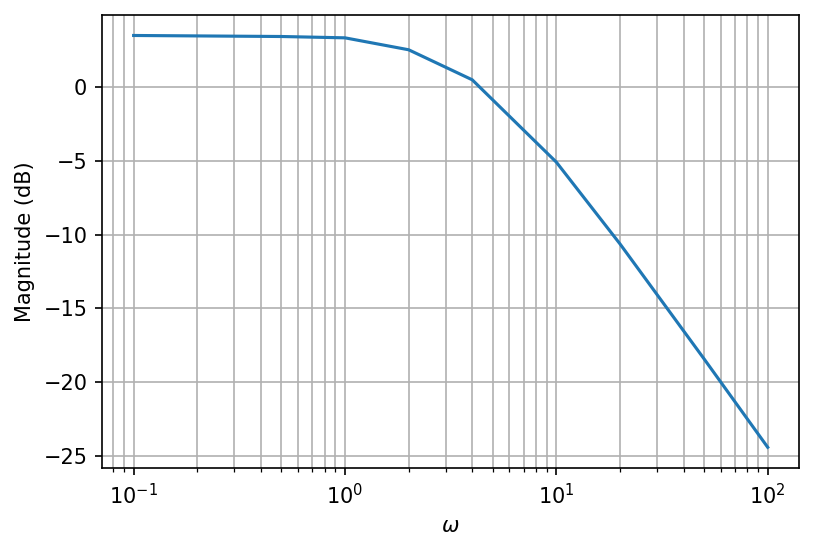

In [4]:
plt.figure(dpi = 150)
plt.plot(freq_1,M_dB)
plt.ylabel('Magnitude (dB)')
plt.xlabel(r'$\omega$')
plt.xscale('log')
plt.grid(True,which="both")
plt.show()

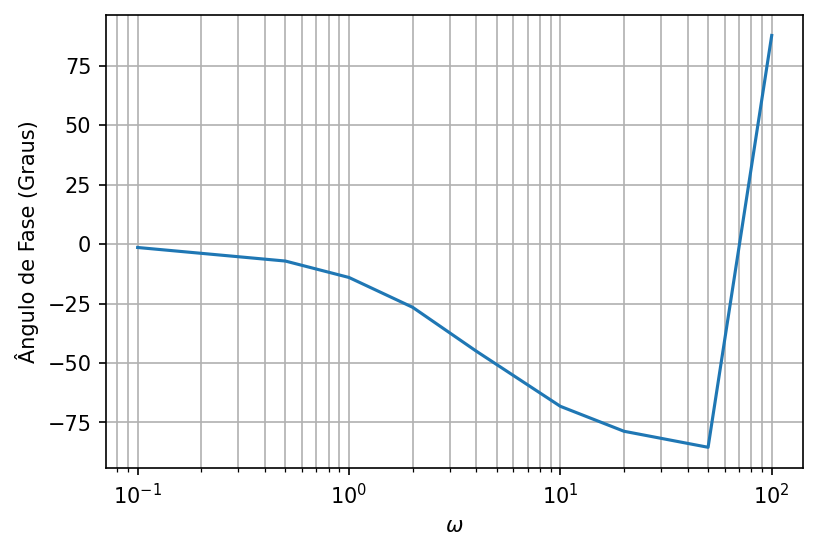

In [5]:
plt.figure(dpi = 150)
plt.plot(freq_1,ang_fase)
plt.ylabel('Ângulo de Fase (Graus)')
plt.xlabel(r'$\omega$')
plt.xscale('log')
plt.grid(True,which="both")
plt.show()

In [6]:
import matplotlib.pyplot as plt
from control import *

In [7]:
G = tf([6],[1,4])
G

TransferFunction(array([6]), array([1, 4]))

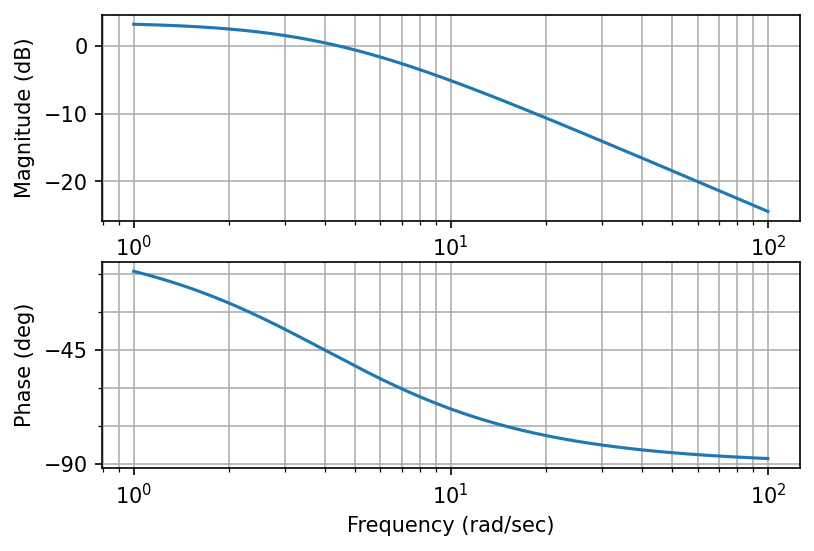

In [8]:
plt.figure(dpi=150)
bode(G,dB = True);

**Exemplo 3:**  
Obtenha o diagrama de Bode para o sistema do exemplo 1:

In [9]:
J = 0.2
b = 1.6
k = 65

G1 = tf([1],[J,b,k])
G1

TransferFunction(array([1]), array([ 0.2,  1.6, 65. ]))

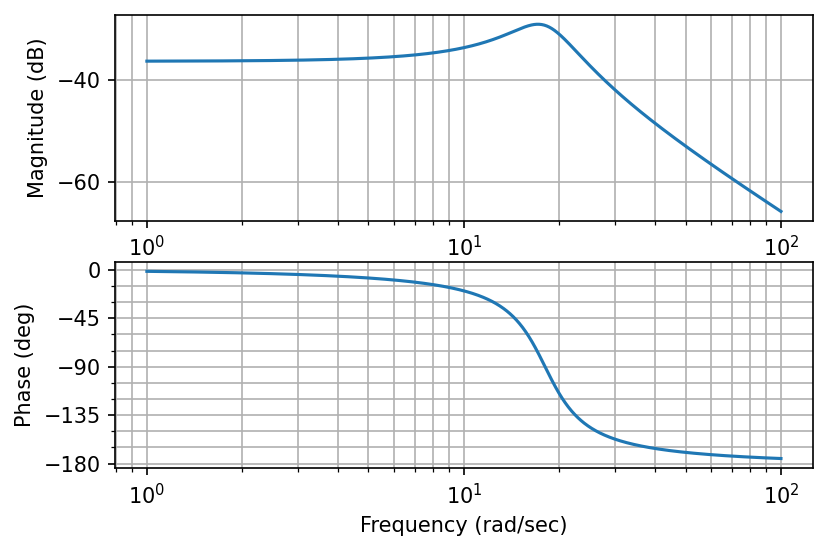

In [10]:
plt.figure(dpi=150)
mag,fase,omega = bode(G1,dB = True);

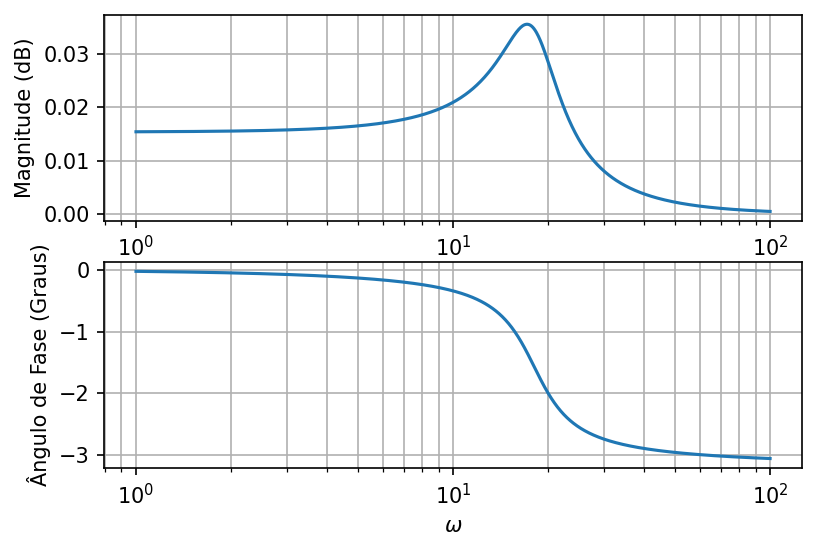

In [11]:
plt.figure(dpi=150)
plt.subplot(211)
plt.plot(omega,mag)
plt.ylabel('Magnitude (dB)')
plt.xlabel(r'$\omega$')
plt.xscale('log')
plt.grid(True,which="both")


plt.subplot(212)
plt.plot(omega,fase)
plt.ylabel('Ângulo de Fase (Graus)')
plt.xlabel(r'$\omega$')
plt.xscale('log')
plt.grid(True,which="both")
plt.show()

Simulando o sistema do exemplo 1:

In [12]:
import  numpy as np

In [13]:
# sampling rate
sr = 2000
# sampling interval
ts = 4.0/sr
tn = np.arange(0,4,ts)

#n = 500
#tf = 2.5
#tn = np.linspace(0,tf,n)
T_ent = 1.5*np.sin(18*tn)
t1,y1 = forced_response(G1,tn,T_ent)

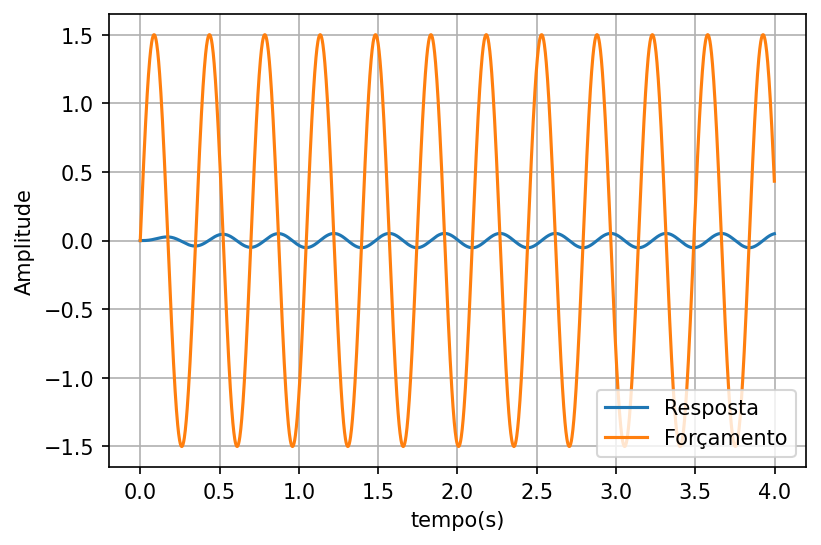

In [14]:
plt.figure(dpi=150)
plt.plot(tn,y1)
plt.plot(tn,T_ent)
plt.legend(['Resposta','Forçamento'])
plt.xlabel('tempo(s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()